In [61]:
%matplotlib inline
import json
import matplotlib
import numpy
import fnmatch
import os
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib.ticker import MaxNLocator
matplotlib.rc('text', usetex=False)
matplotlib.use('Agg')
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['figure.figsize']= [3.125, 1.93]
# matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family']= 'serif'
# matplotlib.rcParams['font.sans-serif']='Times'
matplotlib.rcParams['font.size']= 8
# matplotlib.rcParams['figure.figsize']= [3.125, 1.93]  # Golden ratio
# matplotlib.rcParams['figure.figsize']= [3.125, 1.56]  # Golden ratio
# figure.figsize: 3.125, 1.56  # Squash for more space
# matplotlib.rcParams['legend.fontsize']= 6
# matplotlib.rcParams['legend.fancybox']= True
# matplotlib.rcParams['axes.linewidth']= 0.5

# matplotlib.rcParams['patch.linewidth']= 0.5
# matplotlib.rcParams['lines.linewidth']= 2
# matplotlib.rcParams['grid.linewidth']= 0.1
# matplotlib.rcParams['xtick.major.width']= 0.25
# matplotlib.rcParams['xtick.minor.width']= 0.25
# matplotlib.rcParams['ytick.major.width']= 0.25
# matplotlib.rcParams['ytick.minor.width']= 0.25
# matplotlib.rcParams['legend.numpoints']= 1

import pickle
color_n=['k','r','b','g','m','k','w']
markers=['o','*','^','s','d','3','d','o','*','^','1','4']
linestyles=[ '-',':','--','-.','--',':','-','-.', '--',':']

In [62]:
data = {1: {0: {2: 572040.0, 3: 77.0, 4: 479.0, 6: 77.0},
               1: {2: 47937.0, 3: 4.0, 4: 77.0, 6: 4.0},
               2: {2: 56695698.0, 3: 1318314.0, 4: 7323.0, 6: 2139.0},
               3: {2: 56695698.0, 3: 1235586.0, 4: 348.0, 6: 107.0},
               4: {2: 7972178.0, 3: 133.0, 4: 1537.0, 6: 133.0}},
           2: {0: {2: 619977.0, 3: 81.0, 4: 556.0, 6: 81.0},
               1: {2: 57267738.0, 3: 1318391.0, 4: 7802.0, 6: 2216.0},
               2: {2: 57267738.0, 3: 1235663.0, 4: 827.0, 6: 185.0},
               3: {2: 8544218.0, 3: 210.0, 4: 2016.0, 6: 210.0},
               4: {2: 56743635.0, 3: 1318318.0, 4: 7400.0, 6: 2143.0},
               5: {2: 56743635.0, 3: 1235590.0, 4: 425.0, 6: 112.0},
               6: {2: 8020115.0, 3: 137.0, 4: 1614.0, 6: 137.0},
               7: {2: 113391396.0, 3: 2553900.0, 4: 7671.0, 6: 2246.0},
               8: {2: 64667876.0, 3: 1318447.0, 4: 8860.0, 6: 2272.0},
               9: {2: 64667876.0, 3: 1235719.0, 4: 1885.0, 6: 240.0}},
           3: {0: {2: 57315675.0, 3: 1318395.0, 4: 7879.0, 6: 2220.0},
               1: {2: 57315675.0, 3: 1235667.0, 4: 904.0, 6: 188.0},
               2: {2: 8592155.0, 3: 214.0, 4: 2093.0, 6: 214.0},
               3: {2: 113963436.0, 3: 2553977.0, 4: 8150.0, 6: 2323.0},
               4: {2: 65239916.0, 3: 1318524.0, 4: 9339.0, 6: 2349.0},
               5: {2: 65239916.0, 3: 1235796.0, 4: 2364.0, 6: 318.0},
               6: {2: 113439333.0, 3: 2553904.0, 4: 7748.0, 6: 2250.0},
               7: {2: 64715813.0, 3: 1318451.0, 4: 8937.0, 6: 2276.0},
               8: {2: 121363574.0, 3: 2554033.0, 4: 9208.0, 6: 2380.0}},
           4: {0: {2: 114011373.0, 3: 2553981.0, 4: 314220.0, 6: 2327.0},
               1: {2: 65287853.0, 3: 1318528.0, 4: 12575.0, 6: 2353.0},
               2: {2: 65287853.0, 3: 1235800.0, 4: 5600.0, 6: 322.0},
               3: {2: 121935614.0, 3: 2554110.0, 4: 1290998.0, 6: 2470.0},
               4: {2: 121411511.0, 3: 2554037.0, 4: 149950.0, 6: 2383.0}},
           5: {0: {2: 121983551.0, 3: 2554114.0, 4: 1274557.0, 6: 2610.0}}
           }

In [63]:
modes = {1: "S1", 2:"S2", 3: "S3", 6: "Sonata"}

def get_plot_data(data_in):
    n_queries = data_in.keys()
    n_queries.sort()
    out = {}
    for mode in modes:
        out[mode] = []
        
        if mode == 1:
            out[mode] = [62874535*x for x in n_queries]
        else:
            for n in n_queries:
                tmp = max([data_in[n][x][mode] for x in data_in[n].keys()])
                out[mode].append(tmp)
            
    return out
    

def draw_plots(data, modes):
    f, (ax) = plt.subplots(1)
    for mode in modes:
        x = range(1, 1+len(data[mode]))
        y = data[mode]
        print x, y
        plt.plot(x, y, marker = markers[mode], 
                 linestyle = linestyles[mode], 
                 label=modes[mode],
                )
   
    plt.xlabel('Queries')
    plt.ylabel('Tuples')
    #ax.set_xlim(0, 1.01)
    ax.grid(True)
    pl.locator_params(nticks=5)
    ax.locator_params(nbins=5)
    ax.set_xlim(xmax=5.25)
    ax.set_xlim(xmin=0.75)
    ax.set_yscale("log", nonposy='clip')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
              ncol=4, fancybox=False, shadow=False)
    fname = "/Users/arpit/Documents/nsdi18/writing/figures/key_result.eps"
    plt.tight_layout()
    plot_name = fname
    pl.savefig(plot_name)
    plt.show()
    pass

{1: [62874535, 125749070, 188623605, 251498140, 314372675], 2: [56695698.0, 113391396.0, 121363574.0, 121935614.0, 121983551.0], 3: [1318314.0, 2553900.0, 2554033.0, 2554110.0, 2554114.0], 6: [2139.0, 2272.0, 2380.0, 2470.0, 2610.0]}
[1, 2, 3, 4, 5] [62874535, 125749070, 188623605, 251498140, 314372675]
[1, 2, 3, 4, 5] [56695698.0, 113391396.0, 121363574.0, 121935614.0, 121983551.0]
[1, 2, 3, 4, 5] [1318314.0, 2553900.0, 2554033.0, 2554110.0, 2554114.0]
[1, 2, 3, 4, 5] [2139.0, 2272.0, 2380.0, 2470.0, 2610.0]


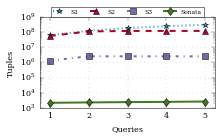

In [64]:
plot_data = get_plot_data(data)
print plot_data
# plot_data = {1: [62874535, 125749070, 188623605, 251498140, 314372675], 
#              2: [56695698.0, 113391396.0, 121363574.0, 121935614.0, 121983551.0], 
#              3: [56695698.0, 57267738.0, 113963436.0, 113963440.0, 114238009.0], 
#              6: [2139.0, 2272.0, 2380.0, 2470.0, 2610.0]
#             }
draw_plots(plot_data, modes)


In [33]:
ls

__init__.py              perf_eval.pyc            training_queries.py
__init__.pyc             plot_results.ipynb       utils.pyc
counts_2_cost_matrix.py  process_caida_data.py    validate_results/
generate_cost_matrix.py  process_cost_matrix.py
key_result.eps           query_specific_analysis/
